# Current infos

In [11]:
SOURCE = '../../Version_0/metrics/42_000 - no GRU - no perturbation - no GATv2/'
DELETE_ALL_EXPECT_LAST= True
REMOVE_ORIGINAL= True
RENAME_DESTINATION= True

# Imports

In [12]:
from metric import Metrics
import shutil
import os

# Static informations

In [13]:
DESTINATION= (SOURCE[:-1] if (SOURCE[-1]=="/") else SOURCE) + "_same_len/"

epoch= os.listdir(SOURCE)[0].split('_')[-1]
base_dirs_raw= os.listdir( os.path.join(SOURCE, f"epoch_{epoch}") )
base_dirs= ["_".join(base_dir_raw.split("_")[:-1]) for base_dir_raw in base_dirs_raw]

epochs= sorted([int(filename.split("_")[-1]) for filename in os.listdir(SOURCE)])

def give_file_path(parent:str=DESTINATION, base_dir:str=None, ext:str=".npz", epoch:int=0) -> str:
    folder= f"epoch_{epoch}"
    file= base_dir + "_" + str(epoch) + ext
    path= os.path.join(parent, folder, file)
    
    return path

# Copy folder

In [14]:
def copy_folder():
    if not os.path.exists(DESTINATION):
        shutil.copytree(SOURCE, DESTINATION)
    else:
        raise ValueError(f"Folder '{DESTINATION}' already exists")

In [15]:
def remove_folder():
    shutil.rmtree(SOURCE)

In [16]:
def rename_destination():
    global DESTINATION
    os.rename(DESTINATION, SOURCE)
    DESTINATION= SOURCE

# Update files

In [17]:
def update_files():
    errors= 0

    for epoch in epochs:
        for base_dir in base_dirs:
            path= give_file_path(base_dir=base_dir, epoch=epoch)
            
            if not os.path.exists(path):
                print(path)
                continue
            
            train, val, test = Metrics.load(path)
            if (len(train) != epoch)  or (len(train) != epoch):        
                epoch_search= epoch-len(train)
                epoch_search_idx= epochs.index(epoch_search)
                epoch_found= epochs[epoch_search_idx]
                
                prev_path= give_file_path(base_dir=base_dir, epoch=epoch_found)
                train, val, test= Metrics.fusion(prev_path, train, val, test)
                Metrics.save(path, train, val, test)
            
            if (len(train) != epoch)  or (len(train) != epoch):
                errors+= 1
                print("ERROR\n", "\t", path, "\n", f"Expected {epoch} - Actual {len(train)}", "\n", sep="")
    
    return errors

# Delete all expect last folder

In [18]:
def delete_all_expect_last():
    last_epoch= epochs[-1]

    for dir in os.listdir(DESTINATION):
        epoch= int( dir.split("_")[-1] )
        path= os.path.join(DESTINATION, dir)
        if epoch != last_epoch:
            shutil.rmtree(path)

# RUN

In [19]:
copy_folder()
errors= update_files()
print("SUCCESS") if errors==0 else print(f"TOTAL FAIL {errors}")
if DELETE_ALL_EXPECT_LAST:
    delete_all_expect_last()
if REMOVE_ORIGINAL:
    remove_folder()
if REMOVE_ORIGINAL and RENAME_DESTINATION:
    rename_destination()

SUCCESS


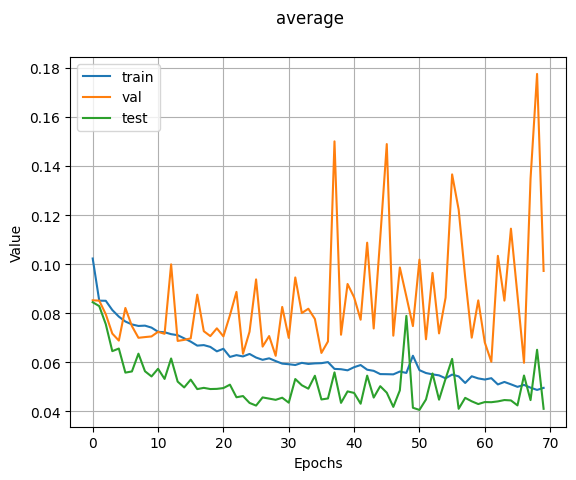

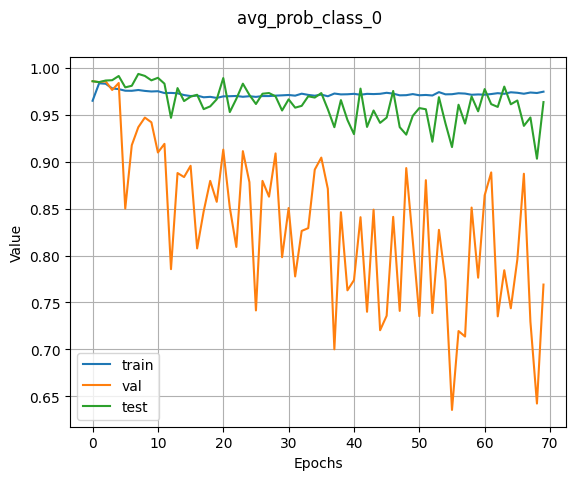

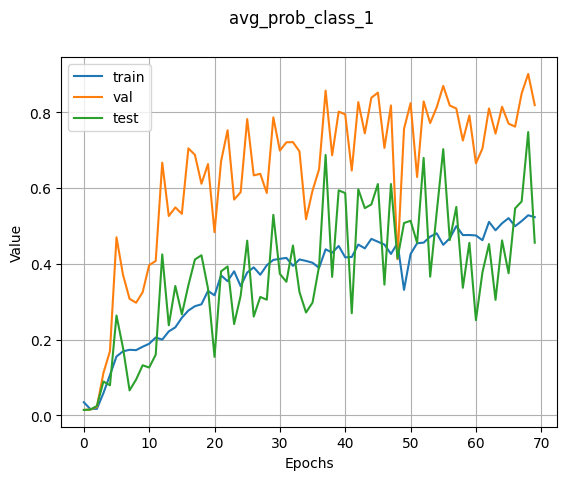

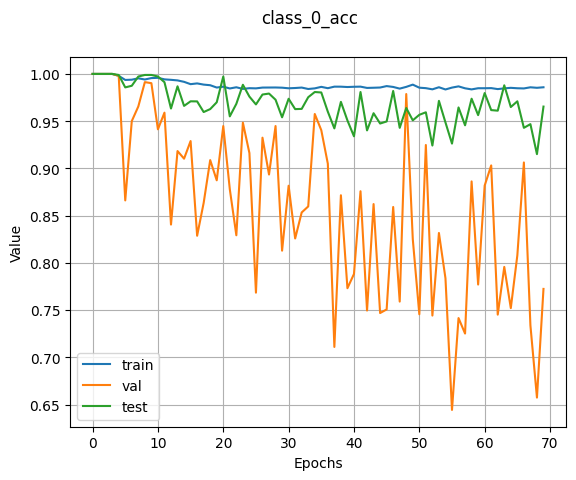

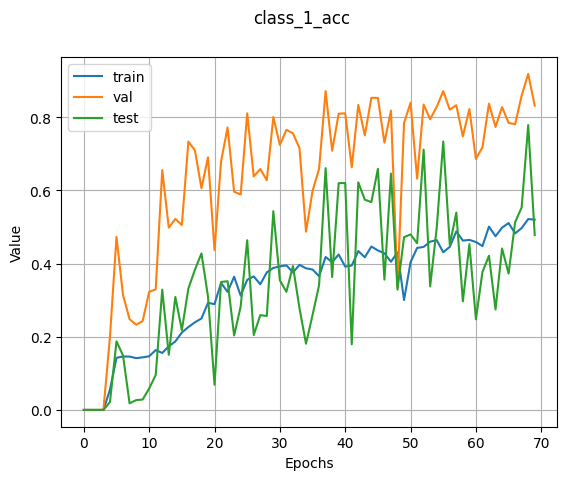

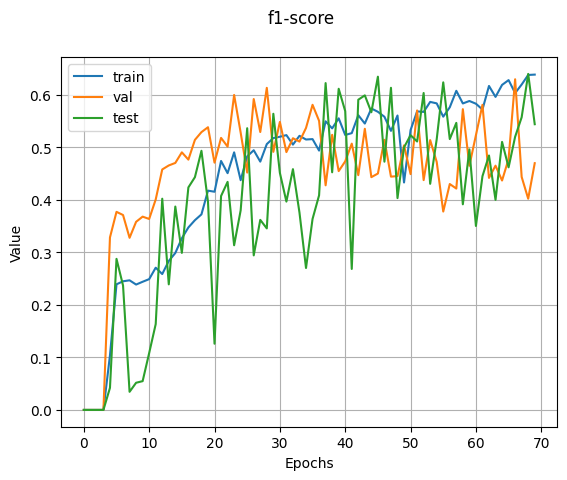

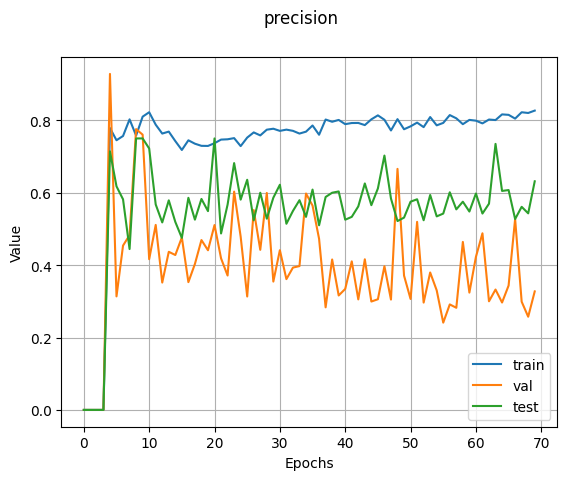

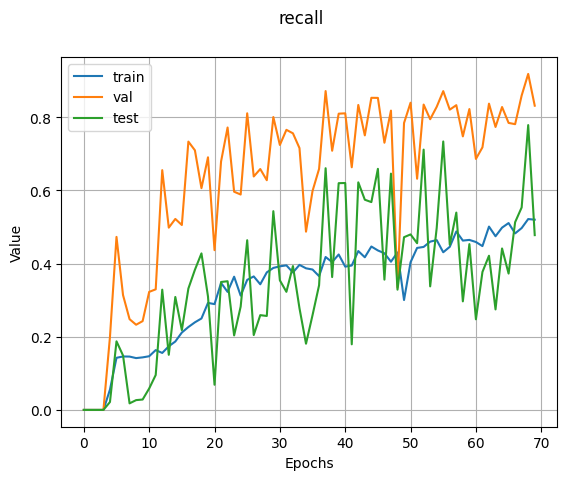

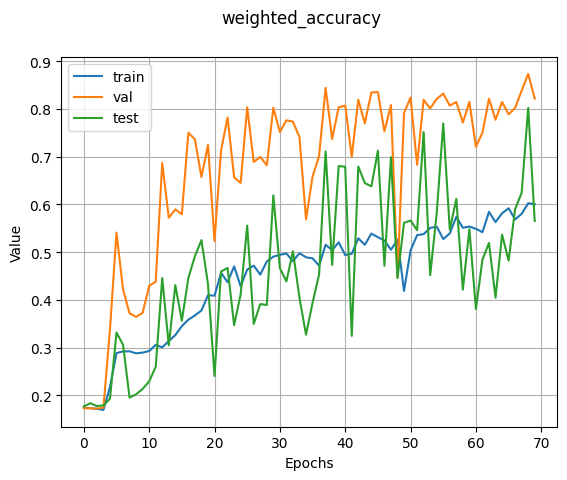

In [20]:
folder= os.path.join(DESTINATION, sorted(os.listdir(DESTINATION), key=lambda x: int(x.split("_")[-1]))[-1])

for file in os.listdir(folder):
    title= "_".join(file.split("_")[:-1])
    path= os.path.join(folder, file)
    Metrics.plot(*Metrics.load(path), metric_name=title, marker=False)